<a href="https://colab.research.google.com/github/ok7097269/Basic-Python/blob/main/img_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import cv2 #이미지 처리
import matplotlib.pyplot as plt #이미지 시각화

import tensorflow_datasets as tfds #사용할 이미지
import tensorflow as tf #딥러닝 모델

In [3]:
data_train, ds_info = tfds.load('cats_vs_dogs', split=[tfds.Split.TRAIN], with_info=True) #tfds 라이브러리
ds_info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteO1Y1L0/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=4.0.0,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=23262,
    splits={
        'train': 23262,
    },
    supervised_keys=('image', 'label'),
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
    booktitle = {Proceedings of 14th ACM Conference on Computer and Communications Security (CCS)},
    ye

In [4]:
images = [one['image'].numpy() for one in data_train[0].take(30)] #이미지 30개 불러오기(numpy로)
len(images)

30

(-0.5, 335.5, 408.5, -0.5)

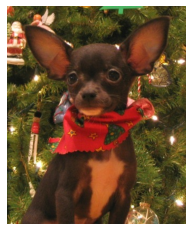

In [5]:
plt.imshow(images[1]) #imshow(matplotlib) 사용해서 보기
plt.axis('off')

In [7]:
resnet50_pre = tf.keras.applications.resnet.ResNet50(weights='imagenet', input_shape=(224, 224, 3)) #resnet 인공지능 모델 사용(from tensorflow) 'imagenet'120만개의 이미지로 학습된 인공지능 사용
resnet50_pre.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [8]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions #인공지능 예측 결과 자체는 수학이라 어떤 대상인지 정의 필요

In [10]:
# 이미지를 예측하는 함수 만들기
def pred_img(img):
  plt.imshow(img)
  plt.axis('off')
  plt.show() #이미지 보여주기

  img_resized = cv2.resize(img, (224,224)) #이미지 사이즈 조정
  pred = resnet50_pre.predict(img_resized.reshape([1, 224,224, 3])) #예측/reshape
  decoded_pred = decode_predictions(pred) #예측 결과 대상 정의

  #결과들을 1위부터 5위까지 보기
  for i, instance in enumerate(decoded_pred[0]):
    print('{}위: {} ({:.2f}%)'.format(i+1, instance[1], instance[2]*100))

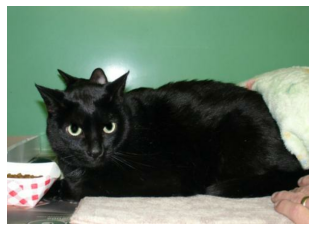

1위: Egyptian_cat (13.10%)
2위: paper_towel (11.39%)
3위: tub (10.80%)
4위: tiger_cat (6.82%)
5위: shower_curtain (3.04%)


In [12]:
pred_img(images[11])